# Regression Model for calculating cars CO2 Emission

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv("C:/Users/karan/Downloads/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(1067, 13)

In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

C:\Users\karan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 2014.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\karan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 2014.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\karan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 2014.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


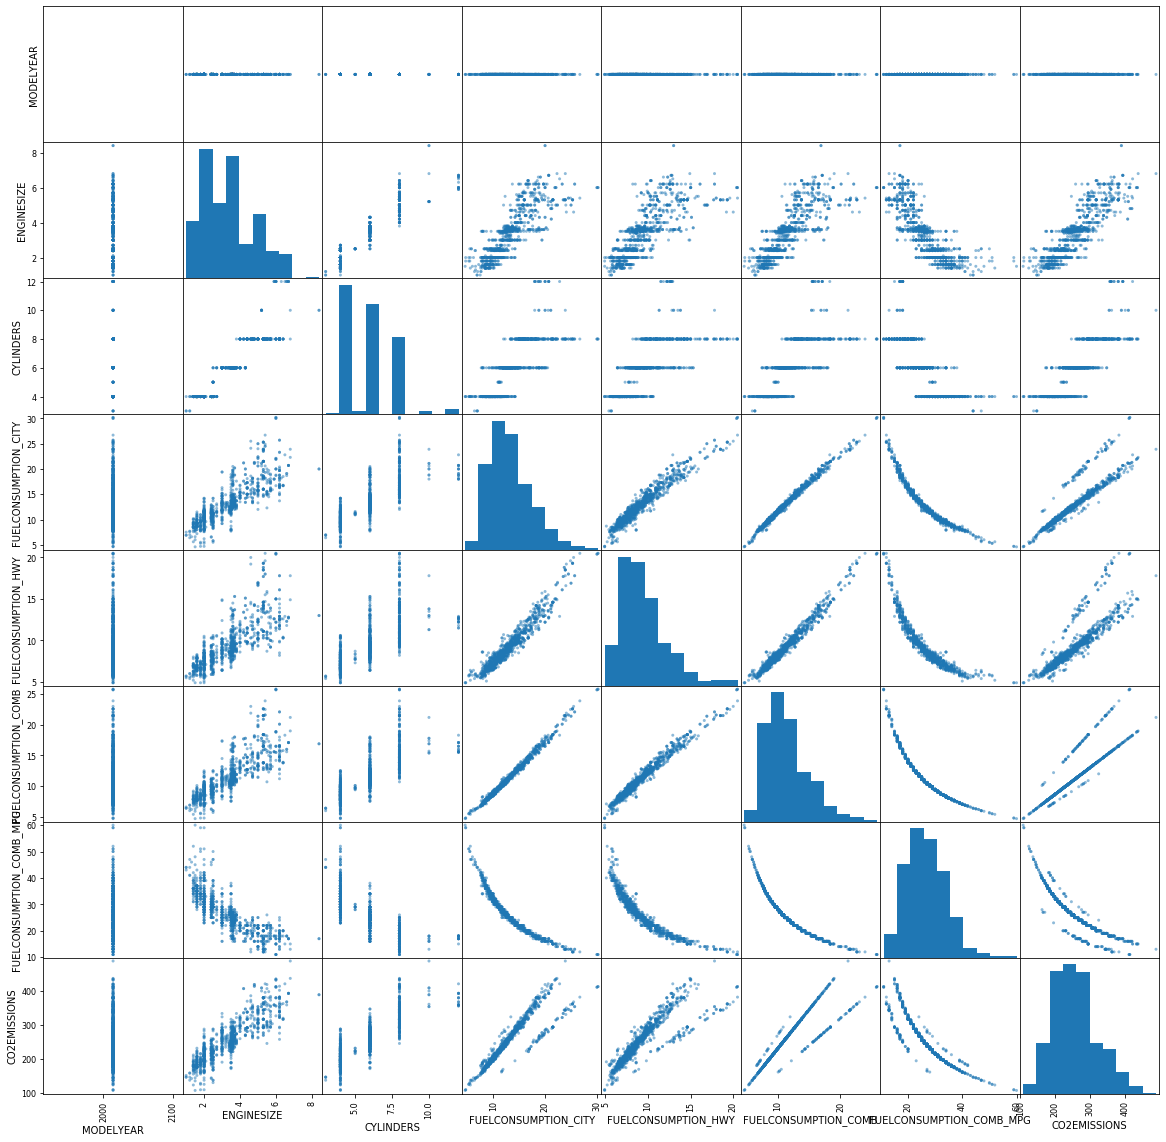

In [7]:
pd.plotting.scatter_matrix(df,figsize=(20,20))
plt.show()

In [8]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


# Linear Regression Model

Coefficients:  [[39.62855453]]
Intercept:  [124.17697162]
Mean absolute error: 22.85
Residual sum of squares (MSE): 867.53
R2-score: 0.77


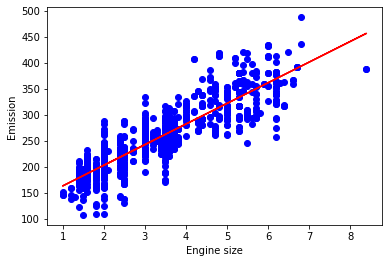

In [9]:
X = np.asarray(df[['ENGINESIZE']])
y = np.asarray(df[['CO2EMISSIONS']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,)

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)
plt.scatter(X,y,  color='blue')
plt.plot(X, reg.coef_[0][0]*X + reg.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

pred_y = reg.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - pred_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - pred_y) ** 2))
print("R2-score: %.2f" % r2_score(y_test, pred_y))

Coefficients:  [[13.88518591]]
Intercept:  [71.28082444]
Mean absolute error: 19.36
Residual sum of squares (MSE): 808.76
R2-score: 0.77


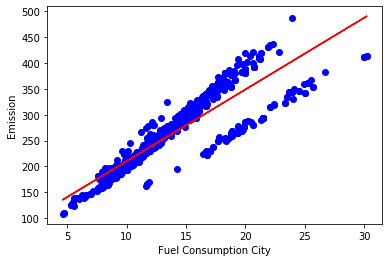

In [10]:
X = np.asarray(df[['FUELCONSUMPTION_CITY']])
y = np.asarray(df[['CO2EMISSIONS']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,)

reg2 = linear_model.LinearRegression()
reg2.fit(X_train,y_train)
print ('Coefficients: ', reg2.coef_)
print ('Intercept: ',reg2.intercept_)
plt.scatter(X,y,  color='blue')
plt.plot(X, reg2.coef_[0][0]*X + reg2.intercept_[0], '-r')
plt.xlabel("Fuel Consumption City")
plt.ylabel("Emission")

pred_y2 = reg2.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - pred_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - pred_y2) ** 2))
print("R2-score: %.2f" % r2_score(y_test, pred_y2))

Coefficients:  [[19.85874718]]
Intercept:  [68.13219343]
Mean absolute error: 22.31
Residual sum of squares (MSE): 960.50
R2-score: 0.71


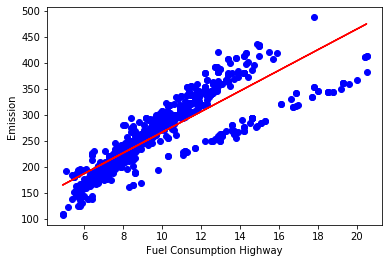

In [11]:
X = np.asarray(df[['FUELCONSUMPTION_HWY']])
y = np.asarray(df[['CO2EMISSIONS']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,)

reg3 = linear_model.LinearRegression()
reg3.fit(X_train,y_train)
print ('Coefficients: ', reg3.coef_)
print ('Intercept: ',reg3.intercept_)
plt.scatter(X,y,  color='blue')
plt.plot(X, reg3.coef_[0][0]*X + reg3.intercept_[0], '-r')
plt.xlabel("Fuel Consumption Highway")
plt.ylabel("Emission")

pred_y3 = reg3.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - pred_y3)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - pred_y3) ** 2))
print("R2-score: %.2f" % r2_score(y_test, pred_y3))

Coefficients:  [[15.94182405]]
Intercept:  [71.2317373]
Mean absolute error: 19.18
Residual sum of squares (MSE): 708.52
R2-score: 0.83


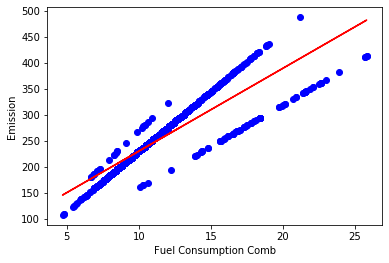

In [12]:
X = np.asarray(df[['FUELCONSUMPTION_COMB']])
y = np.asarray(df[['CO2EMISSIONS']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,)

reg4 = linear_model.LinearRegression()
reg4.fit(X_train,y_train)
print ('Coefficients: ', reg4.coef_)
print ('Intercept: ',reg4.intercept_)
plt.scatter(X,y,  color='blue')
plt.plot(X, reg4.coef_[0][0]*X + reg4.intercept_[0], '-r')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")

pred_y4 = reg4.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - pred_y4)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - pred_y4) ** 2))
print("R2-score: %.2f" % r2_score(y_test, pred_y4))

# MultiIinear Regression

In [36]:
X = np.asarray(df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']])
y = np.asarray(df[['CO2EMISSIONS']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_multiLinear = linear_model.LinearRegression()
selector = RFE(model_multiLinear, n_features_to_select=5, step=1)
selector.fit(X_train, y_train)
pred_y_multi = selector.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - pred_y_multi)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - pred_y_multi) ** 2))
print("R2-score: %.2f" % r2_score(y_test,pred_y_multi))

Mean absolute error: 69.44
Residual sum of squares (MSE): 7684.14
R2-score: 0.86


C:\Users\karan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
X = np.asarray(df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG']])
y = np.asarray(df[['CO2EMISSIONS']])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model_multiLinear = linear_model.LinearRegression()
selector = RFE(model_multiLinear, n_features_to_select=6, step=1)
selector.fit(X_train, y_train)
pred_y_multi = selector.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - pred_y_multi)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_test - pred_y_multi) ** 2))
print("R2-score: %.2f" % r2_score(y_test,pred_y_multi))

Mean absolute error: 74.07
Residual sum of squares (MSE): 8574.76
R2-score: 0.91


C:\Users\karan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The multilinear model with 6 features (ENGINESIZE, CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB,
FUELCONSUMPTION_COMB_MPG) explains 91% of variation of dependent variance (Co2 emission). 